In [1]:
import pandas as pd
import sqlite3

In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

In [3]:
conn = sqlite3.connect('covid19_time_series_confirmed.sqlite')
cursor = conn.cursor()
print("Opened database successfully")

Opened database successfully


In [4]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
covid19_0305_ts_confirmed = pd.read_csv(url)
covid19_0305_ts_confirmed.to_sql('covid19_time_series_confirmed', conn, if_exists='replace')


print(covid19_0305_ts_confirmed.head())

  Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0          Anhui  Mainland China  31.8257  117.2264        1        9   
1        Beijing  Mainland China  40.1824  116.4142       14       22   
2      Chongqing  Mainland China  30.0572  107.8740        6        9   
3         Fujian  Mainland China  26.0789  117.9874        1        5   
4          Gansu  Mainland China  36.0611  103.8343        0        2   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/29/20  3/1/20  3/2/20  3/3/20  \
0       15       39       60       70  ...      990     990     990     990   
1       36       41       68       80  ...      411     413     414     414   
2       27       57       75      110  ...      576     576     576     576   
3       10       18       35       59  ...      296     296     296     296   
4        2        4        7       14  ...       91      91      91      91   

   3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  
0     990     990     990     990 

In [5]:
conn.close()

In [6]:
co = covid19_0305_ts_confirmed.groupby(['Country/Region']).sum()

In [7]:
co.drop(['Lat', 'Long'], axis=1, inplace=True)

In [8]:
co = co.T

In [9]:
co.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20'],
      dtype='object')

In [10]:
co.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Taiwan,Thailand,Togo,Tunisia,UK,US,Ukraine,United Arab Emirates,Vatican City,Vietnam
1/22/20,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,1,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,1,3,0,0,0,1,0,0,0,2
1/24/20,0,0,0,0,0,0,0,0,0,0,...,3,5,0,0,0,2,0,0,0,2
1/25/20,0,0,0,0,0,0,0,0,0,0,...,3,7,0,0,0,2,0,0,0,2
1/26/20,0,0,0,0,0,0,4,0,0,0,...,4,8,0,0,0,5,0,0,0,2


In [11]:
co['Italy'][1]

0

In [12]:
co.index = pd.to_datetime(co.index, infer_datetime_format=True)

In [13]:
co.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09'],
              dtype='datetime64[ns]', freq=None)

In [14]:
co.describe()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Taiwan,Thailand,Togo,Tunisia,UK,US,Ukraine,United Arab Emirates,Vatican City,Vietnam
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.437500,0.041667,2.312500,0.166667,0.770833,0.187500,21.187500,10.645833,1.062500,15.500000,...,22.020833,30.041667,0.083333,0.166667,31.958333,67.937500,0.145833,11.854167,0.083333,12.291667
std,0.872908,0.288675,5.477833,0.376622,2.651692,0.394443,19.461535,27.441613,2.512998,26.883515,...,13.640505,13.239140,0.279310,0.476393,69.391568,131.556218,0.356674,11.623508,0.279310,6.909624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,...,10.000000,19.000000,0.000000,0.000000,2.000000,10.250000,0.000000,5.000000,0.000000,7.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,...,18.000000,33.000000,0.000000,0.000000,9.000000,15.000000,0.000000,8.000000,0.000000,16.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,22.250000,2.250000,0.000000,33.000000,...,32.000000,40.000000,0.000000,0.000000,13.500000,59.250000,0.000000,13.000000,0.000000,16.000000
max,4.000000,2.000000,20.000000,1.000000,12.000000,1.000000,91.000000,131.000000,9.000000,95.000000,...,45.000000,50.000000,1.000000,2.000000,321.000000,605.000000,1.000000,45.000000,1.000000,30.000000


In [15]:
[dict(
                    x=co.index[i].date(),
                    y=co['Italy'][i],
                    text=co.index[i],
                    mode='markers',
                    opacity=0.7,
                    marker={
                        'size': 15,
                        'line': {'width': 0.5, 'color': 'white'}
                    },
                    name=co.index[i]
                ) for i in range(len(co.index))][0]

{'x': datetime.date(2020, 1, 22),
 'y': 0,
 'text': Timestamp('2020-01-22 00:00:00'),
 'mode': 'markers',
 'opacity': 0.7,
 'marker': {'size': 15, 'line': {'width': 0.5, 'color': 'white'}},
 'name': Timestamp('2020-01-22 00:00:00')}

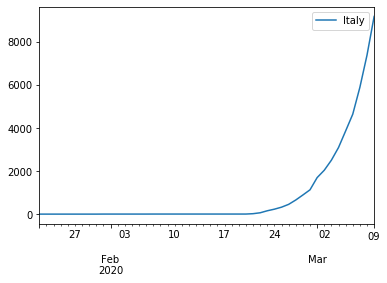

In [16]:
ax = co.plot(y='Italy', use_index=True)

In [17]:
# [co[i] for i in co.columns]

In [18]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

In [19]:
app.layout = html.Div([
       dcc.Dropdown(
    options=[dict(label=i,value=i) for i in co.columns],
    multi=True,
    value="MTL"
       ),
    dcc.Graph(
        id='all-corona',
        figure={
            'data': [dict(x=co.index,y=co[i],name=i) for i in co.columns]
        ,
            'layout': dict(
                xaxis={'title': 'Dates'},
                yaxis={'title': 'Confirmed cases'},
            
            )
        }
    )  
])

In [20]:
# @app.callback(
#     dash.dependencies.Output('graphs','children'),
#     [dash.dependencies.Input('stock-ticker-input', 'value')])
# def update_graph(tickers):
#     graphs = []

#     if not tickers:
#         graphs.append(html.H3(
#             "Select a stock ticker.",
#             style={'marginTop': 20, 'marginBottom': 20}
#         ))
#     else:
#         for i, ticker in enumerate(tickers):

#             dff = df[df['Stock'] == ticker]

#             candlestick = {
#                 'x': dff['Date'],
#                 'open': dff['Open'],
#                 'high': dff['High'],
#                 'low': dff['Low'],
#                 'close': dff['Close'],
#                 'type': 'candlestick',
#                 'name': ticker,
#                 'legendgroup': ticker,
#                 'increasing': {'line': {'color': colorscale[0]}},
#                 'decreasing': {'line': {'color': colorscale[1]}}
#             }
#             bb_bands = bbands(dff.Close)
#             bollinger_traces = [{
#                 'x': dff['Date'], 'y': y,
#                 'type': 'scatter', 'mode': 'lines',
#                 'line': {'width': 1, 'color': colorscale[(i*2) % len(colorscale)]},
#                 'hoverinfo': 'none',
#                 'legendgroup': ticker,
#                 'showlegend': True if i == 0 else False,
#                 'name': '{} - bollinger bands'.format(ticker)
#             } for i, y in enumerate(bb_bands)]
#             graphs.append(dcc.Graph(
#                 id=ticker,
#                 figure={
#                     'data': [candlestick] + bollinger_traces,
#                     'layout': {
#                         'margin': {'b': 0, 'r': 10, 'l': 60, 't': 0},
#                         'legend': {'x': 0}
#                     }
#                 }
#             ))

#     return graphs

In [ ]:
if __name__ == '__main__':
    app.run_server(debug=False,dev_tools_hot_reload=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Mar/2020 22:42:21] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [09/Mar/2020 22:42:21] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [09/Mar/2020 22:42:21] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [09/Mar/2020 22:42:23] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [09/Mar/2020 22:42:28] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [09/Mar/2020 22:42:30] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [09/Mar/2020 22:42:33] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [09/Mar/2020 22:42:36] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [09/Mar/2020 22:42:39] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [09/Mar/2020 22:42:42] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [09/Mar/2020 22:42:45] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [09/Mar/2020 22:42:48] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [09/Mar/2020 22:42:51] "GET /_reload-hash HTTP/1.1" 200 

In [ ]:
%tb

In [ ]:
fig.add_trace(
    go.Scatter(y=co['Italy'], x=co.index))

In [ ]:
# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)